In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Assignment-Specdata

### Data

The zip file containing the data can be downloaded here:

[specdata.zip](https://d396qusza40orc.cloudfront.net/rprog%2Fdata%2Fspecdata.zip) [2.4MB]

The zip file contains 332 comma-separated-value (CSV) files containing pollution monitoring data for fine particulate matter (PM) air pollution at 332 locations in the United States. Each file contains data from a single monitor and the ID number for each monitor is contained in the file name. For example, data for monitor 200 is contained in the file "200.csv". Each file contains three variables:

* Date: the date of the observation in YYYY-MM-DD format (year-month-day)
* sulfate: the level of sulfate PM in the air on that date (measured in micrograms per cubic meter)
* nitrate: the level of nitrate PM in the air on that date (measured in micrograms per cubic meter) 

For this programming assignment you will need to unzip this file and create the directory 'specdata'. Once you have unzipped the zip file, do not make any modifications to the files in the 'specdata' directory. In each file you'll notice that there are many days where either sulfate or nitrate (or both) are missing (coded as NA). This is common with air pollution monitoring data in the United States.

### Part 1

Write a function named 'pollutantmean' that calculates the mean of a pollutant (sulfate or nitrate) across a specified list of monitors. The function 'pollutantmean' takes three arguments: 'directory', 'pollutant', and 'id'. Given a vector monitor ID numbers, 'pollutantmean' reads that monitors' particulate matter data from the directory specified in the 'directory' argument and returns the mean of the pollutant across all of the monitors, ignoring any missing values coded as NA.

In [3]:
import zipfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# download the zipfile and zip it
url = 'https://d396qusza40orc.cloudfront.net/rprog%2Fdata%2Fspecdata.zip'
urllib.request.urlretrieve(url,'specdata.zip')

# zip the files
zf = zipfile.ZipFile('specdata.zip')
for name in zf.namelist()[:5]:
    print(name)

('specdata.zip', <http.client.HTTPMessage at 0x21b8c819e80>)

specdata/
specdata/001.csv
specdata/002.csv
specdata/003.csv
specdata/004.csv


In [5]:
def pollutantmean(directory, pollutant, id=np.arange(1,333)):
    data = pd.Series()
    for i in id:
        df = pd.read_csv(zf.open(directory+'/'+'{:0>3d}'.format(i)+'.csv'))
        data =pd.concat([data, df[pollutant]])    
    print(data.mean()) 

In [6]:
pollutantmean('specdata','sulfate', list(np.arange(1,11)))

4.064128242560356


In [7]:
pollutantmean('specdata','nitrate', list(np.arange(70,73)))

1.7060473516949153


In [8]:
pollutantmean('specdata','sulfate',[34])

1.4771430303030295


In [9]:
pollutantmean('specdata','sulfate')

3.1893686576222318


### Part 2
Write a function that reads a directory full of files and reports the number of completely observed cases in each data file. The function should return a data frame where the first column is the name of the file and the second column is the number of complete cases.

In [10]:
def complete(directory, id=np.arange(1,333)):
    nobs=[]
    idx=[]
    for i in id:
        data = pd.read_csv(zf.open(directory+'/'+'{:0>3d}'.format(i)+'.csv'))
        nobs.append(len(data.dropna(axis=0, how='any')))
        idx.append(i)
        df = pd.DataFrame({'nobs':nobs,'id':idx})
    return(df) 

In [11]:
complete('specdata', [6,10,20,34,100,200,310])

,id,nobs
0,6,228
1,10,148
2,20,124
3,34,165
4,100,104
5,200,460
6,310,232


In [12]:
complete('specdata', [54])

,id,nobs
0,54,219


In [13]:
complete('specdata', list(np.arange(332,0,-1)))[:10]

,id,nobs
0,332,16
1,331,284
2,330,447
3,329,439
4,328,967
5,327,162
6,326,215
7,325,817
8,324,34
9,323,34


### Part 3

Write a function that takes a directory of data files and a threshold for complete cases and calculates the correlation between sulfate and nitrate for monitor locations where the number of completely observed cases (on all variables) is greater than the threshold. The function should return a vector of correlations for the monitors that meet the threshold requirement. If no monitors meet the threshold requirement, then the function should return a numeric vector of length 0.

In [15]:
def correlation(directory, threshold=0):
    df=complete(directory)
    ids = df[df.nobs > threshold]['id']
    sncor = []
    for i in ids:
        newdf = pd.read_csv(zf.open(directory+'/'+'{:0>3d}'.format(i)+'.csv'))
        ndf = newdf.dropna(axis = 0, how='any')[['sulfate','nitrate']]
        sncor.append(ndf.corr())
    return(sncor)

In [16]:
correlation('specdata', 1000)

[          sulfate   nitrate
 sulfate  1.000000 -0.018958
 nitrate -0.018958  1.000000,           sulfate   nitrate
 sulfate  1.000000  0.041918
 nitrate  0.041918  1.000000,           sulfate   nitrate
 sulfate  1.000000  0.190142
 nitrate  0.190142  1.000000]

In [17]:
df=complete('specdata')
ids = df[df.nobs > 1000]['id']
len(ids)
ids

3

1        2
153    154
247    248
Name: id, dtype: int64

In [18]:
x={'one':[1,2,3,4],'two':[3,5,7,5],'three':[2,3,4,9],'four':[4,3,1,0],}
y=pd.DataFrame(x)
print(y.corr())

           four       one     three       two
four   1.000000 -0.989949 -0.880830 -0.670820
one   -0.989949  1.000000  0.913500  0.632456
three -0.880830  0.913500  1.000000  0.262613
two   -0.670820  0.632456  0.262613  1.000000


In [19]:
y
y.iloc[:,0].idxmin()

,four,one,three,two
0,4,1,2,3
1,3,2,3,5
2,1,3,4,7
3,0,4,9,5


3

In [20]:
col_names = y.corr().columns.values

for col, row in (y.corr().abs() > 0.7).iteritems():
    print(col, col_names[row.values])

four ['four' 'one' 'three']
one ['four' 'one' 'three']
three ['four' 'one' 'three']
two ['two']


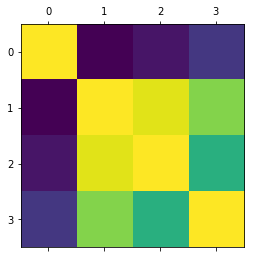

In [21]:
plt.matshow(y.corr())
plt.show()